<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [35]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [36]:
X.head(100)
# X = X.head(100)
# X


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [37]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [38]:
# students get this 
transform = preprocessing.StandardScaler().fit(X).transform(X)
transform

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [40]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}  # l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8196428571428571


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
scr_logreg = logreg_cv.score(X_test, Y_test)
scr_logreg

0.8333333333333334

Lets look at the confusion matrix:


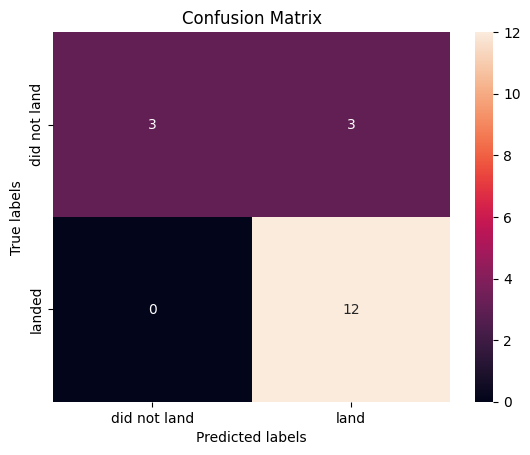

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm

SVC()

In [18]:
svm_cv = GridSearchCV(svm, parameters, cv=2, verbose=10)
# cv=10 takes for ever can't actually run with 10 so changed to 2...
print('Training (fitting) ...')
svm_cv.fit(X_test, Y_test)
print('Done training.')

Training (fitting) ...
Fitting 2 folds for each of 125 candidates, totalling 250 fits
[CV 1/2; 1/125] START C=0.001, gamma=0.001, kernel=linear.......................
[CV 1/2; 1/125] END C=0.001, gamma=0.001, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/2; 1/125] START C=0.001, gamma=0.001, kernel=linear.......................
[CV 2/2; 1/125] END C=0.001, gamma=0.001, kernel=linear;, score=0.889 total time=   0.0s
[CV 1/2; 2/125] START C=0.001, gamma=0.001, kernel=rbf..........................
[CV 1/2; 2/125] END C=0.001, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/2; 2/125] START C=0.001, gamma=0.001, kernel=rbf..........................
[CV 2/2; 2/125] END C=0.001, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/2; 3/125] START C=0.001, gamma=0.001, kernel=poly.........................
[CV 1/2; 3/125] END C=0.001, gamma=0.001, kernel=poly;, score=0.333 total time=   0.0s
[CV 2/2; 3/125] START C=0.001, gamma=0.001, kernel=poly.................

In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.6666666666666666


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
scr_svm = svm_cv.score(X_test, Y_test)
scr_svm

0.6666666666666666

We can plot the confusion matrix


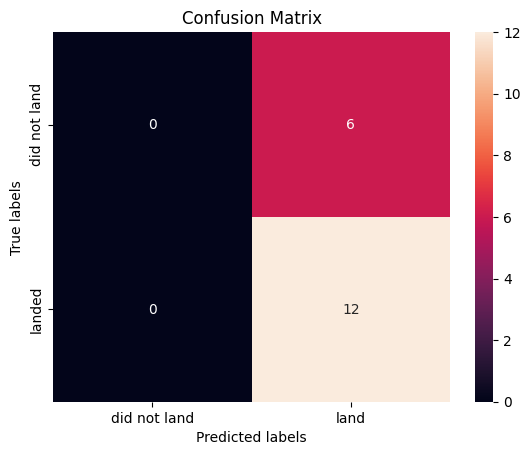

In [21]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [23]:
tree_cv = GridSearchCV(tree, parameters, cv=2, verbose=10)
# cv=10 takes for ever can't actually run with 10 so changed to 2...
print('Training (fitting) ...')
tree_cv.fit(X_train, Y_train)
print('Done training.')

Training (fitting) ...
Fitting 2 folds for each of 648 candidates, totalling 1296 fits
[CV 1/2; 1/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 1/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.611 total time=   0.0s
[CV 2/2; 1/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 1/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 2/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 2/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 2/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 2/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 3/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 3/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 3/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 3/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 4/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 4/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 4/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 4/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.472 total time=   0.0s
[CV 1/2; 5/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 5/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 5/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 5/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 6/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 6/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 6/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 6/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 7/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 7/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 7/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 7/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 8/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 8/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 8/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 8/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 9/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 9/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.278 total time=   0.0s
[CV 2/2; 9/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 9/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.389 total time=   0.0s
[CV 1/2; 10/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 10/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 10/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 10/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 11/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 11/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.444 total time=   0.0s
[CV 2/2; 11/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 11/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 12/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 12/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 12/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 12/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 13/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 13/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 13/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 13/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 14/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 14/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 14/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 14/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 15/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 15/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.944 total time=   0.0s
[CV 2/2; 15/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 15/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 16/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 16/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 16/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 16/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.528 total time=   0.0s
[CV 1/2; 17/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 17/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 17/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 17/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 18/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 18/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 18/648] START criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 18/648] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 19/648] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 19/648] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.444 total time=   0.0s
[CV 2/2; 19/648] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 19/648] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.444 total time=   0.0s
[CV 1/2; 20/648] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 20/648] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total 

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 37/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 37/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 37/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 38/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 38/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 38/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 38/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 39/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 39/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 39/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 39/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 40/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 40/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 40/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 40/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 41/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 41/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 41/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 41/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 1/2; 42/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 42/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 42/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 42/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 43/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 43/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 43/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 43/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 44/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 44/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 44/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 44/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 45/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 45/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 2/2; 45/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 45/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 46/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 46/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 46/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 46/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 47/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 47/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 47/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 47/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 48/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 48/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.417 total time=   0.0s
[CV 2/2; 48/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 48/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.528 total time=   0.0s
[CV 1/2; 49/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 49/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 2/2; 49/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 49/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 50/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 50/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 50/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 50/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 51/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 51/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 51/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 51/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.417 total time=   0.0s
[CV 1/2; 52/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 52/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 52/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 52/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.500 total time=   0.0s
[CV 1/2; 53/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 53/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 53/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 53/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 54/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 54/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 54/648] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 54/648] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 55/648] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 55/648] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 55/648] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 55/648] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 56/648] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 56/648] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.833 total 

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 73/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 73/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 73/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 74/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 74/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 74/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 74/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 75/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 75/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 75/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 75/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 76/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 76/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 76/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 76/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 77/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 77/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 77/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 77/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 78/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 78/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 78/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 78/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 79/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 79/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 79/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 79/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 80/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 80/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 80/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 80/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.528 total time=   0.0s
[CV 1/2; 81/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 81/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 2/2; 81/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 81/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 82/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 82/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 82/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 82/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 83/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 83/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 83/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 83/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 84/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 84/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.611 total time=   0.0s
[CV 2/2; 84/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 84/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 85/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 85/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 85/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 85/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 86/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 86/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 86/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 86/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 87/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 87/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 87/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 87/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 88/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 88/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 88/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 88/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 89/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 89/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 89/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 89/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 90/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 90/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.889 total time=   0.0s
[CV 2/2; 90/648] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 90/648] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 91/648] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 91/648] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 91/648] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 91/648] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 92/648] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 92/648] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.722 total 

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 109/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 109/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 109/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 110/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 110/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 110/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 110/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 111/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 111/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 111/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 111/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 112/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 112/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 112/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 112/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 113/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 113/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 113/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 113/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 114/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 114/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.694 total time=   0.0s
[CV 2/2; 114/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 114/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 115/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 115/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 115/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 115/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 116/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 116/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 116/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 116/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 117/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 117/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 117/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 117/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.528 total time=   0.0s
[CV 1/2; 118/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 118/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 118/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 118/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 119/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 119/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 119/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 119/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 120/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 120/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 120/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 120/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 121/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 121/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 121/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 121/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 122/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 122/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 122/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 122/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 123/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 123/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 123/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 123/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 124/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 124/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 124/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 124/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 125/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 125/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 125/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 125/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 126/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 126/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 126/648] START criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 126/648] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 127/648] START criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 127/648] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 127/648] START criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 127/648] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 128/648] START criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 128/648] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 145/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 145/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 145/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 1/2; 146/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 146/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 146/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 146/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 147/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 147/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.472 total time=   0.0s
[CV 2/2; 147/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 147/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 148/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 148/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 148/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 148/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 149/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 149/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 149/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 149/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 150/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 150/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 150/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 150/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.444 total time=   0.0s
[CV 1/2; 151/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 151/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 151/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 151/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 152/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 152/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 152/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 152/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 153/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 153/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 153/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 153/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 154/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 154/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 154/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 154/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 1/2; 155/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 155/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 155/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 155/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 156/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 156/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 156/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 156/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 157/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 157/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 157/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 157/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 158/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 158/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 158/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 158/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 159/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 159/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 159/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 159/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 160/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 160/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 160/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 160/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.444 total time=   0.0s
[CV 1/2; 161/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 161/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 161/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 161/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 162/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 162/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 162/648] START criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 162/648] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 163/648] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 163/648] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 163/648] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 163/648] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 1/2; 164/648] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 164/648] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, scor

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 181/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 181/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 181/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 182/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 182/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 182/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 182/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 183/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 183/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 183/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 183/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 184/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 184/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 184/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 184/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.722 total time=   0.0s
[CV 1/2; 185/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 185/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 185/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 185/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 186/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 186/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 186/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 186/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 1/2; 187/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 187/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 187/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 187/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 188/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 188/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 188/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 188/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 189/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 189/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 189/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 189/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 190/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 190/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 190/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 190/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 191/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 191/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 191/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 191/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.500 total time=   0.0s
[CV 1/2; 192/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 192/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 192/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 192/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 193/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 193/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 193/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 193/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 194/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 194/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 194/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 194/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 195/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 195/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 195/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 195/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 196/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 196/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.611 total time=   0.0s
[CV 2/2; 196/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 196/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 197/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 197/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 197/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 197/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 198/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 198/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 198/648] START criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 198/648] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 199/648] START criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 199/648] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 199/648] START criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 199/648] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 200/648] START criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 200/648] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, scor

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 217/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 217/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 217/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 1/2; 218/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 218/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 218/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 218/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 219/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 219/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 2/2; 219/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 219/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 220/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 220/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 220/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 220/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 221/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 221/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 221/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 221/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 222/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 222/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 222/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 222/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 223/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 223/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.889 total time=   0.0s
[CV 2/2; 223/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 223/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 1/2; 224/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 224/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 224/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 224/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 225/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 225/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 225/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 225/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 1/2; 226/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 226/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 226/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 226/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 227/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 227/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 227/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 227/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 228/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 228/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.889 total time=   0.0s
[CV 2/2; 228/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 228/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 229/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 229/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 229/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 229/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 230/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 230/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.944 total time=   0.0s
[CV 2/2; 230/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 230/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.500 total time=   0.0s
[CV 1/2; 231/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 231/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 2/2; 231/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 231/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 232/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 232/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 232/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 232/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 233/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 233/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 233/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 233/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 234/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 234/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 234/648] START criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 234/648] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 235/648] START criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 235/648] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 235/648] START criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 235/648] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 236/648] START criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 236/648] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, scor

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 253/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 2/2; 253/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 253/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 254/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 254/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 2/2; 254/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 254/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 255/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 255/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 2/2; 255/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 255/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 1/2; 256/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 256/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 2/2; 256/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 256/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 257/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 257/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 257/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 257/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 258/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 258/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 258/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 258/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 259/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 259/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 259/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 259/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 260/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 260/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 260/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 260/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 261/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 261/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 261/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 261/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 1/2; 262/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 262/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.722 total time=   0.0s
[CV 2/2; 262/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 262/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 263/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 263/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 263/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 263/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.389 total time=   0.0s
[CV 1/2; 264/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 264/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 264/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 264/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 265/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 265/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 265/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 265/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 1/2; 266/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 266/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 266/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 266/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 267/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 267/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 267/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 267/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 268/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 268/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.556 total time=   0.0s
[CV 2/2; 268/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 268/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 269/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 269/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 269/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 269/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 270/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 270/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 270/648] START criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 270/648] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 271/648] START criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 271/648] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 271/648] START criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 271/648] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 272/648] START criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 272/648] END criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, scor

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 289/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 289/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 289/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 290/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 290/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 2/2; 290/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 290/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 291/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 291/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 291/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 291/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 292/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 292/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.611 total time=   0.0s
[CV 2/2; 292/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 292/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 293/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 293/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 293/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 293/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 294/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 294/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 294/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 294/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 295/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 295/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 295/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 295/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 296/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 296/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 296/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 296/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 297/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 297/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 297/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 297/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.444 total time=   0.0s
[CV 1/2; 298/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 298/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 298/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 298/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.389 total time=   0.0s
[CV 1/2; 299/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 299/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 299/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 299/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 1/2; 300/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 300/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 300/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 300/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 301/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 301/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 2/2; 301/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 301/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 1/2; 302/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 302/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 302/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 302/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 303/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 303/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 2/2; 303/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 303/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 304/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 304/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 304/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 304/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.556 total time=   0.0s
[CV 1/2; 305/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 305/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 305/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 305/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 306/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 306/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.722 total time=   0.0s
[CV 2/2; 306/648] START criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 306/648] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.556 total time=   0.0s
[CV 1/2; 307/648] START criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 307/648] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 307/648] START criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 307/648] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 1/2; 308/648] START criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 308/648] END criterion=gini, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, scor

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 325/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.333 total time=   0.0s
[CV 2/2; 325/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 325/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.389 total time=   0.0s
[CV 1/2; 326/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 326/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 326/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 326/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 327/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 327/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 327/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 327/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 328/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 328/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 328/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 328/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.444 total time=   0.0s
[CV 1/2; 329/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 329/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 329/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 329/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 330/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 330/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 330/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 330/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 331/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 331/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 331/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 331/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 332/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 332/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 332/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 332/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 333/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 333/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 333/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 333/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 334/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 334/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 334/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 334/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 335/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 335/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 335/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 335/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 336/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 336/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 336/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 336/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 337/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 337/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 337/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 337/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.389 total time=   0.0s
[CV 1/2; 338/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 338/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 338/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 338/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 339/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 339/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 339/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 339/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 340/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 340/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.444 total time=   0.0s
[CV 2/2; 340/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 340/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 341/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 341/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 341/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 341/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.389 total time=   0.0s
[CV 1/2; 342/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 342/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 342/648] START criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 342/648] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 343/648] START criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 343/648] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 343/648] START criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 343/648] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 344/648] START criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 344/648] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 361/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 361/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 361/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 362/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 362/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 362/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 362/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.472 total time=   0.0s
[CV 1/2; 363/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 363/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 363/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 363/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 364/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 364/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 364/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 364/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 365/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 365/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 365/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 365/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 366/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 366/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 366/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 366/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 367/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 367/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 367/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 367/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 368/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 368/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 368/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 368/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 1/2; 369/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 369/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 2/2; 369/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 369/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 370/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 370/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 370/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 370/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 371/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 371/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 371/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 371/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 372/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 372/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 372/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 372/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.500 total time=   0.0s
[CV 1/2; 373/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 373/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 373/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 373/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.889 total time=   0.0s
[CV 1/2; 374/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 374/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 374/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 374/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 375/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 375/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 375/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 375/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 376/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 376/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 376/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 376/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 377/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 377/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.694 total time=   0.0s
[CV 2/2; 377/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 377/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 378/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 378/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 378/648] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 378/648] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 379/648] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 379/648] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 379/648] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 379/648] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 1/2; 380/648] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 380/648] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 397/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 397/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 397/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 398/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 398/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 2/2; 398/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 398/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 399/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 399/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.472 total time=   0.0s
[CV 2/2; 399/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 399/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 400/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 400/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 400/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 400/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 401/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 401/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 401/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 401/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 402/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 402/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 402/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 402/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 403/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 403/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.889 total time=   0.0s
[CV 2/2; 403/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 403/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 404/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 404/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.583 total time=   0.0s
[CV 2/2; 404/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 404/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.472 total time=   0.0s
[CV 1/2; 405/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 405/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 405/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 405/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 406/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 406/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.889 total time=   0.0s
[CV 2/2; 406/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 406/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 407/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 407/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 407/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 407/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 408/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 408/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 408/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 408/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 409/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 409/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 409/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 409/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 410/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 410/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 410/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 410/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 411/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 411/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 411/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 411/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 412/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 412/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 412/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 412/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 413/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 413/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 413/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 413/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 414/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 414/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 414/648] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 414/648] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 415/648] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 415/648] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 415/648] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 415/648] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.528 total time=   0.0s
[CV 1/2; 416/648] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 416/648] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 433/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 433/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 433/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 434/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 434/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 434/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 434/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 435/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 435/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 435/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 435/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 436/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 436/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 436/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 436/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 437/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 437/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 437/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 437/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 438/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 438/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 438/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 438/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 439/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 439/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 439/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 439/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 440/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 440/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 440/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 440/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 441/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 441/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 441/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 441/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 442/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 442/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 2/2; 442/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 442/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 443/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 443/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 443/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 443/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 444/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 444/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.889 total time=   0.0s
[CV 2/2; 444/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 444/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 445/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 445/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 445/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 445/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 446/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 446/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.583 total time=   0.0s
[CV 2/2; 446/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 446/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 447/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 447/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 447/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 447/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 448/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 448/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 448/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 448/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 449/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 449/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.944 total time=   0.0s
[CV 2/2; 449/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 449/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 450/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 450/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 450/648] START criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 450/648] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 451/648] START criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 451/648] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 451/648] START criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 451/648] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 452/648] START criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 452/648] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 469/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 469/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 469/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 470/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 470/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 470/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 470/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 471/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 471/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 471/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 471/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 1/2; 472/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 472/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 472/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 472/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.528 total time=   0.0s
[CV 1/2; 473/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 473/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 473/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 473/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 474/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 474/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 474/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 474/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 475/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 475/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 2/2; 475/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 475/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 476/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 476/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 476/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 476/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.472 total time=   0.0s
[CV 1/2; 477/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 477/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 477/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 477/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 478/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 478/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 478/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 478/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 479/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 479/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 479/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 479/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 480/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 480/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 480/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 480/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.722 total time=   0.0s
[CV 1/2; 481/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 481/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 481/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 481/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.444 total time=   0.0s
[CV 1/2; 482/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 482/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 482/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 482/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.583 total time=   0.0s
[CV 1/2; 483/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 483/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 483/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 483/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 484/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 484/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 484/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 484/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 485/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 485/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.917 total time=   0.0s
[CV 2/2; 485/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 485/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 486/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 486/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 486/648] START criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 486/648] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 487/648] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 487/648] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 487/648] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 487/648] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 488/648] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 488/648] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, s

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 505/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 2/2; 505/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 505/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 506/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 506/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 2/2; 506/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 506/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 1/2; 507/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 507/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 507/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 507/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 508/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 508/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 508/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 508/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 509/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 509/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 509/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 509/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 510/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 510/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 510/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 510/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 511/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 511/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 2/2; 511/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 511/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 512/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 512/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 512/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 512/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 513/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 513/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 2/2; 513/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 513/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 514/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 514/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 514/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 514/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 515/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 515/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 515/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 515/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 516/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 516/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.722 total time=   0.0s
[CV 2/2; 516/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 516/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 517/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 517/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 517/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 517/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.444 total time=   0.0s
[CV 1/2; 518/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 518/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 518/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 518/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 1/2; 519/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 519/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 519/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 519/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 520/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 520/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 520/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 520/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 521/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 521/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 521/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 521/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 522/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 522/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 522/648] START criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 522/648] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 523/648] START criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 523/648] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 523/648] START criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 523/648] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 1/2; 524/648] START criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 524/648] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, s

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 541/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 541/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 541/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 542/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 542/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 2/2; 542/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 542/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 1/2; 543/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 543/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 543/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 543/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 544/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 544/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 544/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 544/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.472 total time=   0.0s
[CV 1/2; 545/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 545/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 545/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 545/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 546/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 546/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.556 total time=   0.0s
[CV 2/2; 546/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 546/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 547/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 547/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.500 total time=   0.0s
[CV 2/2; 547/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 547/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 548/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 548/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 548/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 548/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 549/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 549/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 549/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 549/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 550/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 550/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 550/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 550/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 551/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 551/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.889 total time=   0.0s
[CV 2/2; 551/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 551/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 552/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 552/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.528 total time=   0.0s
[CV 2/2; 552/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 552/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 553/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 553/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 553/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 553/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 554/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 554/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 554/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 554/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.444 total time=   0.0s
[CV 1/2; 555/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 555/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.472 total time=   0.0s
[CV 2/2; 555/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 555/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 556/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 556/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 2/2; 556/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 556/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 557/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 557/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 2/2; 557/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 557/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 1/2; 558/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 558/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 558/648] START criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 558/648] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 1/2; 559/648] START criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 559/648] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.639 total time=   0.0s
[CV 2/2; 559/648] START criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 559/648] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 560/648] START criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 560/648] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, s

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 577/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 577/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 577/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.583 total time=   0.0s
[CV 1/2; 578/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 578/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.611 total time=   0.0s
[CV 2/2; 578/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 578/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 579/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 579/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.500 total time=   0.0s
[CV 2/2; 579/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 579/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 580/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 580/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 580/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 580/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 581/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 581/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 581/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 581/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 582/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 582/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.722 total time=   0.0s
[CV 2/2; 582/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 582/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 583/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 583/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 583/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 583/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.528 total time=   0.0s
[CV 1/2; 584/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 584/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 584/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 584/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 585/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 585/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 585/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 585/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 586/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 586/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 586/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 586/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 1/2; 587/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 587/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.639 total time=   0.0s
[CV 2/2; 587/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 587/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 588/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 588/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 588/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 588/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.472 total time=   0.0s
[CV 1/2; 589/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 589/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 589/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 589/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/2; 590/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 590/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.611 total time=   0.0s
[CV 2/2; 590/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 590/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.556 total time=   0.0s
[CV 1/2; 591/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 591/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 591/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 591/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 1/2; 592/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 592/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 592/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 592/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 593/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 593/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 593/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 593/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 594/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 594/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.667 total time=   0.0s
[CV 2/2; 594/648] START criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 594/648] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.556 total time=   0.0s
[CV 1/2; 595/648] START criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 595/648] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 2/2; 595/648] START criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 595/648] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 596/648] START criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 596/648] END criterion=entropy, max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, s

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 613/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 613/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 613/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 614/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 614/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 614/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 614/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 615/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 615/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 615/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 615/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 616/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 616/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 2/2; 616/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 616/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 1/2; 617/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 617/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 2/2; 617/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 617/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 618/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 618/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 2/2; 618/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 618/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.611 total time=   0.0s
[CV 1/2; 619/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 619/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.694 total time=   0.0s
[CV 2/2; 619/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 619/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.389 total time=   0.0s
[CV 1/2; 620/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 620/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 2/2; 620/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 620/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.556 total time=   0.0s
[CV 1/2; 621/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 621/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 621/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 621/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 622/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 622/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 622/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 622/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 1/2; 623/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 623/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.861 total time=   0.0s
[CV 2/2; 623/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 623/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 1/2; 624/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 624/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 624/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 624/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 1/2; 625/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 625/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/2; 625/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 625/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.639 total time=   0.0s
[CV 1/2; 626/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 626/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 2/2; 626/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 626/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 627/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 627/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 627/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 627/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.556 total time=   0.0s
[CV 1/2; 628/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 628/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 2/2; 628/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 628/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 1/2; 629/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 629/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 2/2; 629/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 629/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 1/2; 630/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/2; 630/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 2/2; 630/648] START criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random


/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 2/2; 630/648] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.556 total time=   0.0s
[CV 1/2; 631/648] START criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/2; 631/648] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 2/2; 631/648] START criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/2; 631/648] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/2; 632/648] START criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/2; 632/648] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, s

/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Done training.


In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [25]:
scr_tree = tree_cv.score(X_test, Y_test)
scr_tree

0.8333333333333334

We can plot the confusion matrix


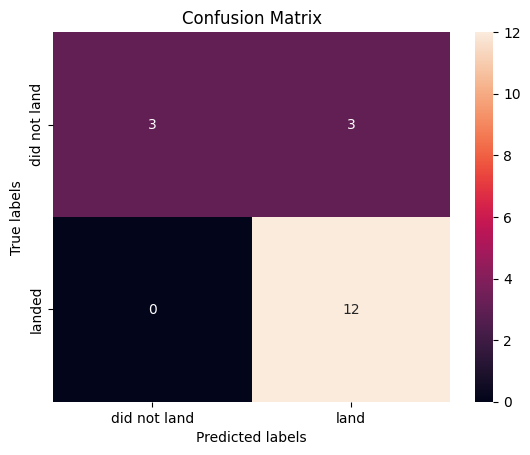

In [26]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [28]:
knn_cv = GridSearchCV(KNN, parameters, cv=2, verbose=10)
knn_cv.fit(X_train, Y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV 1/2; 1/80] START algorithm=auto, n_neighbors=1, p=1.........................
[CV 1/2; 1/80] END algorithm=auto, n_neighbors=1, p=1;, score=0.472 total time=   0.0s
[CV 2/2; 1/80] START algorithm=auto, n_neighbors=1, p=1.........................
[CV 2/2; 1/80] END algorithm=auto, n_neighbors=1, p=1;, score=0.583 total time=   0.0s
[CV 1/2; 2/80] START algorithm=auto, n_neighbors=1, p=2.........................
[CV 1/2; 2/80] END algorithm=auto, n_neighbors=1, p=2;, score=0.500 total time=   0.0s
[CV 2/2; 2/80] START algorithm=auto, n_neighbors=1, p=2.........................
[CV 2/2; 2/80] END algorithm=auto, n_neighbors=1, p=2;, score=0.583 total time=   0.0s
[CV 1/2; 3/80] START algorithm=auto, n_neighbors=2, p=1.........................
[CV 1/2; 3/80] END algorithm=auto, n_neighbors=2, p=1;, score=0.500 total time=   0.0s
[CV 2/2; 3/80] START algorithm=auto, n_neighbors=2, p=1.........................
[CV 2/2; 3/80] EN

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             verbose=10)

In [29]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.6805555555555556


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [30]:
scr_knn = knn_cv.score(X_test, Y_test)
scr_knn

0.7222222222222222

We can plot the confusion matrix


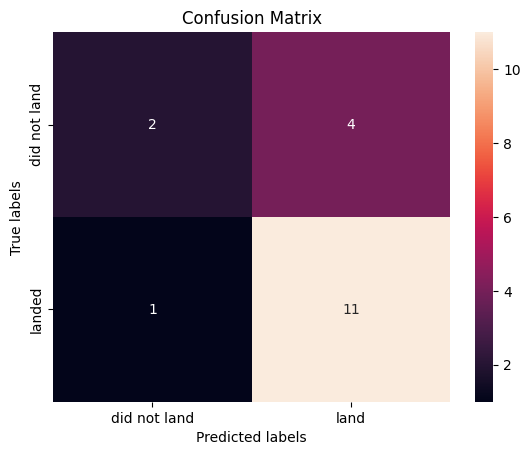

In [31]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [34]:
methods = {
'LogisticRegression': scr_logreg,
'SVC': scr_svm,
'DecisionTreeClassifier': scr_tree,
'KNeighborsClassifier': scr_knn,
}

print(methods)
ma = max(methods, key=methods.get)
print('Best method is: {} with score {} '.format(ma, methods[ma]))

{'LogisticRegression': 0.8333333333333334, 'SVC': 0.6666666666666666, 'DecisionTreeClassifier': 0.8333333333333334, 'KNeighborsClassifier': 0.7222222222222222}
Best method is: LogisticRegression with score 0.8333333333333334 


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
